In [5]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow.keras as keras

# DATA SOURCE --------------------------------------------------

batch_size = 30

train_data_dir = './data/cards/train/'

validation_data_dir = './data/cards/valid/'

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# MODEL --------------------------------------------------

model = Sequential()

model.add(keras.Input((224, 224, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Antes 256
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Antes 128
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-3),  # Changed optimizer to Adam
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 45

es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose=1, patience=15, restore_best_weights=True)

# Use the train_generator for training
history = model.fit(
    train_generator, 
    epochs=epochs, 
    steps_per_epoch=train_generator.samples // batch_size, 
    validation_data= validation_generator,
    callbacks = [es]
    )

model.save('modelo.keras')

Found 7509 images belonging to 4 classes.
Found 260 images belonging to 4 classes.


KeyboardInterrupt: 

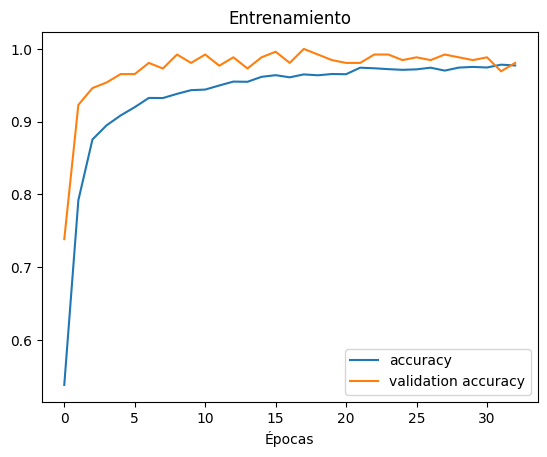

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
  
#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

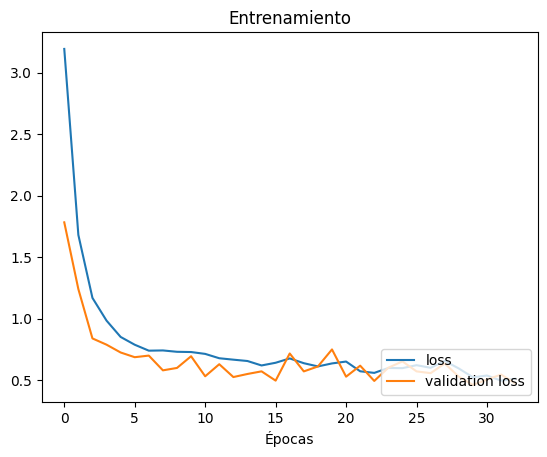

In [ ]:
from matplotlib import pyplot as plt 
  
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

Found 260 files belonging to 4 classes.
1/1 [==============================] - 0s 40ms/step
              precision    recall  f1-score   support

           0     0.9538    1.0000    0.9764        62
           1     1.0000    0.9420    0.9701        69
           2     0.9692    0.9844    0.9767        64
           3     0.9846    0.9846    0.9846        65

    accuracy                         0.9769       260
   macro avg     0.9769    0.9778    0.9770       260
weighted avg     0.9776    0.9769    0.9769       260



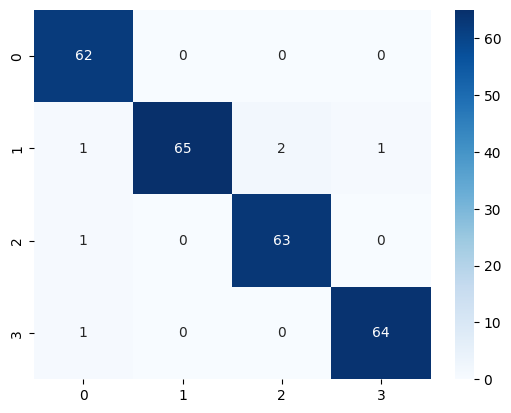

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    directory='./data/cards/test/',
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical'
)

results = np.concatenate([(y, model.predict(x=x)) for x, y in valid_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.models import load_model
import tensorflow.keras as keras

# DATA SOURCE --------------------------------------------------
batch_size = 16

train_data_dir = './data/spanish_cards_mod/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Cargar el modelo previamente guardado
model = keras.models.load_model('modelo.keras')

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-3),  # Changed optimizer to Adam
              metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose=1, patience=25, restore_best_weights=True)

# Entrenar con los nuevos datos
epochs_new = 200  # Puedes ajustar esto según sea necesario

history_new = model.fit(
    train_generator,
    epochs=epochs_new,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,  # Utilizar el generador de validación
    callbacks=[es]
)

# Guardar el modelo después del entrenamiento con nuevos datos
model.save("modelo_esp.keras")

Found 128 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Epoch 1/200
8/8 [==============================] - 7s 624ms/step - loss: 1.9983 - accuracy: 0.3203 - val_loss: 1.6334 - val_accuracy: 0.3281
Epoch 2/200
8/8 [==============================] - 3s 441ms/step - loss: 1.6382 - accuracy: 0.2812 - val_loss: 1.4033 - val_accuracy: 0.5000
Epoch 3/200
8/8 [==============================] - 3s 350ms/step - loss: 1.4856 - accuracy: 0.4609 - val_loss: 1.4432 - val_accuracy: 0.4922
Epoch 4/200
8/8 [==============================] - 3s 457ms/step - loss: 1.3704 - accuracy: 0.5547 - val_loss: 1.2631 - val_accuracy: 0.5859
Epoch 5/200
8/8 [==============================] - 3s 346ms/step - loss: 1.2452 - accuracy: 0.6641 - val_loss: 1.2674 - val_accuracy: 0.5781
Epoch 6/200
8/8 [==============================] - 3s 341ms/step - loss: 1.3646 - accuracy: 0.5234 - val_loss: 1.2758 - val_accuracy: 0.5781
Epoch 7/200
8/8 [==============================] - 3s 434ms/step - loss:

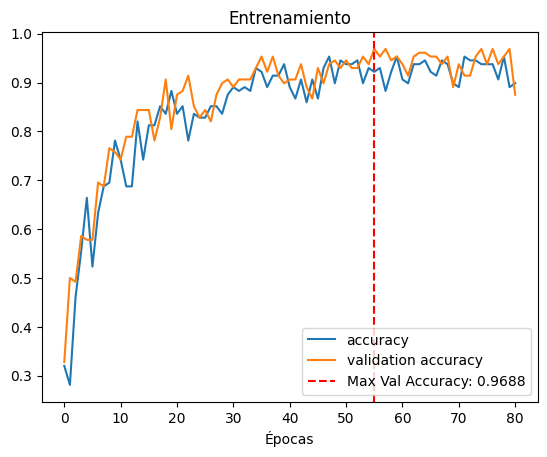

In [2]:
from matplotlib import pyplot as plt 

plt.plot(history_new.history['accuracy'], label='accuracy')
plt.plot(history_new.history['val_accuracy'], label='validation accuracy')
  
#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='validation loss')

max_val_accuracy_index = history_new.history['val_accuracy'].index(max(history_new.history['val_accuracy']))

plt.axvline(x=max_val_accuracy_index, color='red', linestyle='--', label=f'Max Val Accuracy: {max(history_new.history["val_accuracy"]):.4f}')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

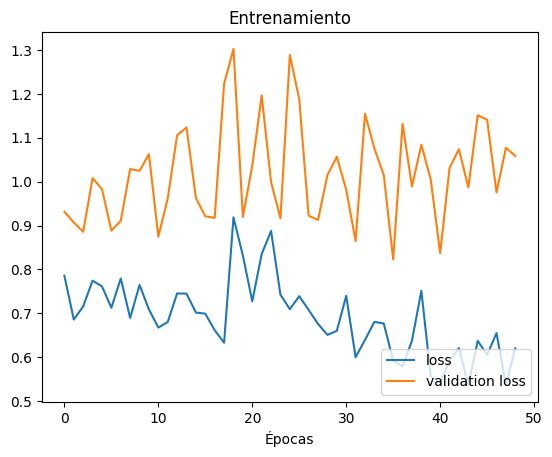

In [5]:
from matplotlib import pyplot as plt 
  
plt.plot(history_new.history['loss'], label='loss')
plt.plot(history_new.history['val_loss'], label='validation loss')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

Found 128 files belonging to 4 classes.
1/1 [==============================] - 0s 38ms/step
              precision    recall  f1-score   support

           0     0.9062    0.9667    0.9355        30
           1     0.8750    0.8235    0.8485        34
           2     0.7500    1.0000    0.8571        24
           3     1.0000    0.8000    0.8889        40

    accuracy                         0.8828       128
   macro avg     0.8828    0.8975    0.8825       128
weighted avg     0.8979    0.8828    0.8831       128



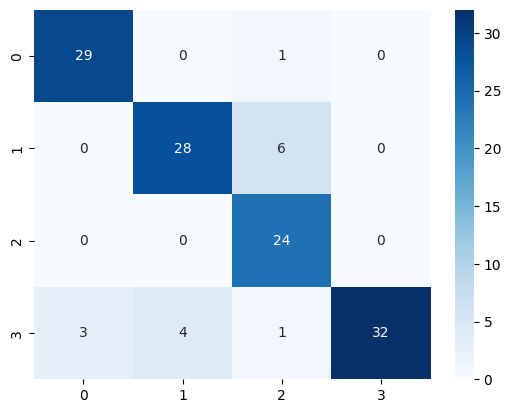

In [3]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    directory='./data/spanish_cards_mod/',
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical'
)

results = np.concatenate([(y, model.predict(x=x)) for x, y in valid_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import load_model
import tensorflow.keras as keras

# DATA SOURCE --------------------------------------------------
batch_size = 30

train_data_dir = './data/combined_cards/train/'

validation_data_dir = './data/combined_cards/valid/'

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_datagen = ImageDataGenerator(rescale=1./255,)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Cargar el modelo previamente guardado
model = keras.models.load_model('modelo_esp.keras')

# Actualizar la capa final para tener 8 unidades
model.layers[-1].kernel_initializer = keras.initializers.glorot_uniform()
model.layers[-1].bias_initializer = keras.initializers.Zeros()
model.pop()
model.add(Dense(8, activation='softmax', name='dense_new'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-3),  # Changed optimizer to Adam
              metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose=1, patience=25, restore_best_weights=True)

# Entrenar con los nuevos datos
epochs_new = 200  # Puedes ajustar esto según sea necesario

history_new = model.fit(
    train_generator,
    epochs=epochs_new,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,  # Utilizar el generador de validación
    callbacks=[es]
)

# Guardar el modelo después del entrenamiento con nuevos datos
model.save("modelo_completo.keras")

Found 7645 images belonging to 8 classes.
Found 300 images belonging to 8 classes.
Epoch 1/200
254/254 [==============================] - 43s 161ms/step - loss: 0.7854 - accuracy: 0.8810 - val_loss: 0.9314 - val_accuracy: 0.8533
Epoch 2/200
254/254 [==============================] - 40s 155ms/step - loss: 0.6858 - accuracy: 0.9438 - val_loss: 0.9070 - val_accuracy: 0.8667
Epoch 3/200
254/254 [==============================] - 39s 154ms/step - loss: 0.7158 - accuracy: 0.9514 - val_loss: 0.8858 - val_accuracy: 0.8767
Epoch 4/200
254/254 [==============================] - 38s 151ms/step - loss: 0.7743 - accuracy: 0.9523 - val_loss: 1.0080 - val_accuracy: 0.8700
Epoch 5/200
254/254 [==============================] - 40s 156ms/step - loss: 0.7615 - accuracy: 0.9523 - val_loss: 0.9832 - val_accuracy: 0.8733
Epoch 6/200
254/254 [==============================] - 40s 158ms/step - loss: 0.7125 - accuracy: 0.9552 - val_loss: 0.8883 - val_accuracy: 0.8833
Epoch 7/200
254/254 [====================

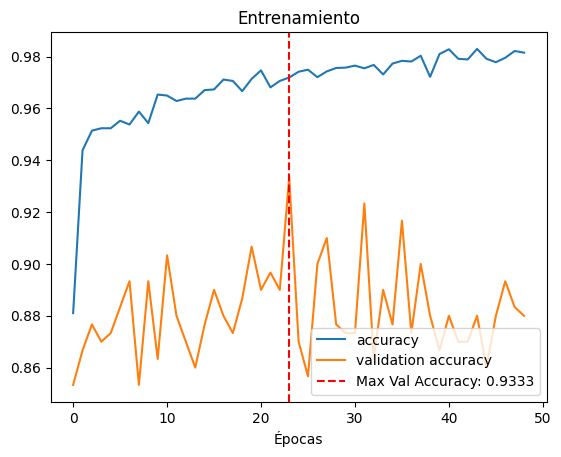

In [6]:
from matplotlib import pyplot as plt 

plt.plot(history_new.history['accuracy'], label='accuracy')
plt.plot(history_new.history['val_accuracy'], label='validation accuracy')
  
#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='validation loss')

max_val_accuracy_index = history_new.history['val_accuracy'].index(max(history_new.history['val_accuracy']))

plt.axvline(x=max_val_accuracy_index, color='red', linestyle='--', label=f'Max Val Accuracy: {max(history_new.history["val_accuracy"]):.4f}')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

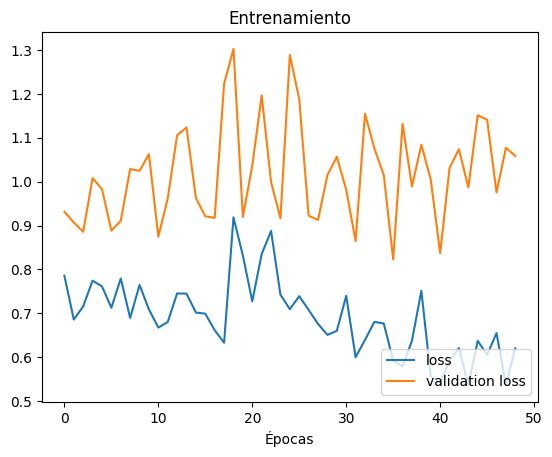

In [7]:
from matplotlib import pyplot as plt 
  
plt.plot(history_new.history['loss'], label='loss')
plt.plot(history_new.history['val_loss'], label='validation loss')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

Found 300 files belonging to 8 classes.
1/1 [==============================] - 0s 56ms/step
              precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667         5
           1     0.9385    1.0000    0.9683        61
           2     0.9000    0.4286    0.5806        21
           3     1.0000    0.9420    0.9701        69
           4     1.0000    0.6250    0.7692        16
           5     0.9385    0.9839    0.9606        62
           6     0.0000    0.0000    0.0000         0
           7     0.9692    0.9545    0.9618        66

    accuracy                         0.9133       300
   macro avg     0.7808    0.7418    0.7347       300
weighted avg     0.9527    0.9133    0.9229       300



c:\Users\PC Gaming\anaconda3\envs\FSI\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC Gaming\anaconda3\envs\FSI\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC Gaming\anaconda3\envs\FSI\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


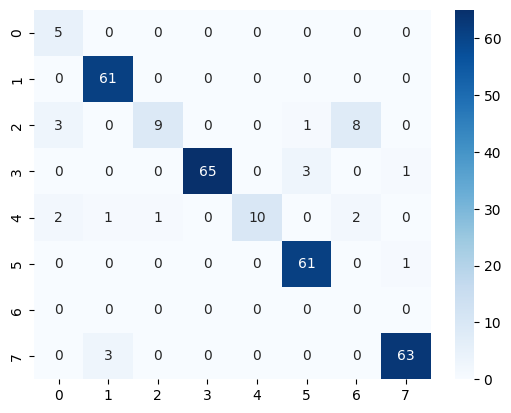

In [9]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    directory='./data/combined_cards/test/',
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical'
)

results = np.concatenate([(y, model.predict(x=x)) for x, y in valid_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))